In [1]:
import pandas as pd
import itertools as it
import numpy as np
import networkx as nx
from networkx.algorithms import community as nxcom
import matplotlib.pyplot as plt
import statistics as stat
import powerlaw as pw

In [2]:
path = 'C:/Users/Lenovo/Documents/GitHub/NetSci/dataset/imdb_disney.xlsx'
excel_disney = pd.ExcelFile(path)
sheets_disney = excel_disney.sheet_names[1:]
raw_disney = dict((sheets_disney[i], excel_disney.parse(sheets_disney[i])) for i in range(len(sheets_disney)))

In [3]:
year_disney = {'SnowWhite': 1937, 'Pinocchio': 1940, 'Fantasia': 1940, 'Dumbo': 1941, 'Bambi': 1942, 'Saludos': 1942,
 'Caballeros': 1944, 'MakeMine': 1946, 'FunFancy': 1947, 'MelodyTime': 1948, 'MrToad': 1949, 'Cinderella': 1950,
 'Alice': 1951, 'PeterPan': 1953, 'Tramp': 1955, 'SleepingBeauty': 1959, 'Dalmatians': 1961, 'SwordStone': 1963,
 'JungleBook': 1967, 'Aristocrats': 1970, 'RobinHood': 1973, 'Pooh': 1977, 'Rescuers': 1977, 'FoxHound': 1981,
 'BlackCauldron': 1985, 'MouseDetective': 1986, 'Oliver': 1988, 'LittleMermaid': 1989, 'RescueDown': 1990,
 'BeautyBeast': 1991, 'Aladdin': 1992, 'LionKing': 1994, 'Pocahontas': 1995, 'Hunchback': 1996, 'Hercules': 1997,
 'Mulan': 1998, 'Tarzan': 1999, 'Fantasia2000': 1999, 'Dinosaur': 2000, 'Emperor': 2000, 'Atlantis': 2001,
 'LiloStitch': 2002, 'TreasurePlanet': 2002, 'BroBear': 2003, 'HomeRange': 2004, 'ChikLittle': 2005,
 'Robinsons': 2007, 'Bolt': 2008, 'PrincessFrog': 2009, 'Tangled': 2010, 'Pooh3D': 2011, 'WreckRalph': 2012,
 'Frozen': 2013, 'BigHero6': 2014, 'Zootopia': 2016, 'Moana': 2016, 'RalphNet': 2018}

In [4]:
for film in sheets_disney:
    print("\nfilm:", film)
    raw_disney[film]['film'] = film
    raw_disney[film]['year'] = year_disney[film]
    print(raw_disney[film][0:4])


film: SnowWhite
               crew       dept                function       film  year
0  William Cottrell  direction     (sequence director)  SnowWhite  1937
1        David Hand  direction  (supervising director)  SnowWhite  1937
2   Wilfred Jackson  direction     (sequence director)  SnowWhite  1937
3       Larry Morey  direction     (sequence director)  SnowWhite  1937

film: Pinocchio
              crew       dept             function       film  year
0  Norman Ferguson  direction  (sequence director)  Pinocchio  1940
1           T. Hee  direction  (sequence director)  Pinocchio  1940
2  Wilfred Jackson  direction  (sequence director)  Pinocchio  1940
3      Jack Kinney  direction  (sequence director)  Pinocchio  1940

film: Fantasia
               crew       dept  \
0       James Algar  direction   
1  Samuel Armstrong  direction   
2    Ford Beebe Jr.  direction   
3   Norman Ferguson  direction   

                                            function      film  year  
0  (segm

3  Ron Clements    writers      (written by)  LittleMermaid  1989

film: RescueDown
                crew       dept                     function        film  year
0       Hendel Butoy  direction                          NaN  RescueDown  1990
1       Mike Gabriel  direction                          NaN  RescueDown  1990
2            Jim Cox    writers  (animation screenplay by) &  RescueDown  1990
3  Karey Kirkpatrick    writers  (animation screenplay by) &  RescueDown  1990

film: BeautyBeast
               crew       dept                   function         film  year
0    Gary Trousdale  direction                        NaN  BeautyBeast  1991
1         Kirk Wise  direction                        NaN  BeautyBeast  1991
2  Linda Woolverton    writers  (animation screenplay by)  BeautyBeast  1991
3    Brenda Chapman    writers               (story by) &  BeautyBeast  1991

film: Aladdin
           crew       dept             function     film  year
0  Ron Clements  direction             

                  crew       dept                            function    film  \
0  Stephen J. Anderson  direction                                 NaN  Pooh3D   
1             Don Hall  direction                                 NaN  Pooh3D   
2  Stephen J. Anderson    writers  (story by) (as Stephen Anderson) &  Pooh3D   
3          Clio Chiang    writers                        (story by) &  Pooh3D   

   year  
0  2011  
1  2011  
2  2011  
3  2011  

film: WreckRalph
            crew       dept      function        film  year
0     Rich Moore  direction           NaN  WreckRalph  2012
1     Rich Moore    writers  (story by) &  WreckRalph  2012
2  Phil Johnston    writers  (story by) &  WreckRalph  2012
3    Jim Reardon    writers    (story by)  WreckRalph  2012

film: Frozen
                      crew       dept  \
0               Chris Buck  direction   
1             Jennifer Lee  direction   
2             Jennifer Lee    writers   
3  Hans Christian Andersen    writers   

      

In [5]:
#Concatenate the films into one flat file
data_disney = pd.concat(raw_disney).replace({'dept': {'director': 'direction', 'co-director': 'direction'}})
print(data_disney)

                           crew       dept                 function  \
SnowWhite 0    William Cottrell  direction      (sequence director)   
          1          David Hand  direction   (supervising director)   
          2     Wilfred Jackson  direction      (sequence director)   
          3         Larry Morey  direction      (sequence director)   
          4        Perce Pearce  direction      (sequence director)   
...                         ...        ...                      ...   
RalphNet  314    Chris Williams  animation  additional story artist   
          315     Jeff Williams  animation                 animator   
          316      Alena Wooten  animation        character modeler   
          317       Jennifer Yu  animation      Lighting Supervisor   
          318       Amanda Zima  animation                 animator   

                    film  year  
SnowWhite 0    SnowWhite  1937  
          1    SnowWhite  1937  
          2    SnowWhite  1937  
          3    

In [6]:
data_disney.columns

Index(['crew', 'dept', 'function', 'film', 'year'], dtype='object')

#### Ensuring the values of each variable is unique for each film data

In [7]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [8]:
def verify_unique(df, var):
    df['ones'] = 1
    unique = df.groupby(var)['ones'].sum()
    print("Verify: {}. Total entries: {}. Unique entries: {}".format(var, len(df.index), len(unique)))
    print_full(df.groupby(var)['ones'].sum())

In [9]:
verify_unique(data_disney, 'crew')

Verify: crew. Total entries: 16094. Unique entries: 4099
crew
A.A. Milne                                 2
Aaron Adams                                2
Aaron Blaise                               7
Aaron C. Adams                             1
Aaron Campbell                             4
Aaron Holly                                1
Aaron James McComas                        3
Aaron Kandell                              1
Aaron Marine                               1
Aaron Williams                             1
Abhishek Singh                             1
Abra Grupp                                 2
Abraham Aguilar                            4
Abraham Franklin Tseng                     3
Adam Cobabe                                3
Adam Dykstra                              13
Adam Garza                                 1
Adam Green                                 7
Adam J. York                               1
Adam King                                  1
Adam Levy                             

In [10]:
len(data_disney.index)

16094

In [11]:
see = data_disney
see['ones'] = 1
unique = see.groupby('crew')['ones'].sum()
print(len(list(see.groupby('crew')['ones'])))
print(unique)



4099
crew
A.A. Milne        2
Aaron Adams       2
Aaron Blaise      7
Aaron C. Adams    1
Aaron Campbell    4
                 ..
Zilvinas Lilas    1
Zoltan Maros      3
Zsolt Krajcsik    1
Zubin Wadia       5
Åsa Svedberg      1
Name: ones, Length: 4099, dtype: int64


#### Create fully connected graph among the nodes for each film

##### Model 1
In this model we shall consider only the directors, story writers, screenplay and producers. And we presume that they are knitted together.

In [12]:
#Check the unique values of dept
print(data_disney['dept'].unique())

#Clean up the values and store the extracted in data_disney1
data_disney1 = data_disney.replace({'dept': {'director': 'direction', 'co-director': 'direction'}})
print("unique values dept", data_disney1['dept'].unique())

#Extract values
data_disney1.loc['dept'] = 'direction'


#Drop duplicates. Each node should be unique
#data_disney1 = data_disney1.drop_duplicates(['a','b'])

['direction' 'writers' 'producer' 'art direction' 'visual effects'
 'animation' 'art']
unique values dept ['direction' 'writers' 'producer' 'art direction' 'visual effects'
 'animation' 'art']


#### Create a data set for network graph
1. Limit data_pixar by crew
2. drop duplictaes in each film
3. combination of edges
4. append to model1

In [46]:
#Store the nodes for Model1
scope = ['direction', 'producer', 'writers', 'screenplay']
data1 = data_disney.loc[data_disney['dept'].isin(scope)]
nodes_disney = pd.DataFrame()
for film in sheets_disney:
    crew = data1.loc[data1['film']==film].drop_duplicates('crew')
    nodes = crew['crew']
    nodes_disney = pd.concat([nodes_disney, nodes])
nodes_disney = nodes_disney.drop_duplicates()
nodes_disney['studio'] = 'Disney'
print(nodes_disney)

#Save the data set
nodes_disney.to_csv('C:/Users/Lenovo/Documents/GitHub/NetSci/dataset/nodes_disney.csv')

                               0  studio
(SnowWhite, 0)  William Cottrell  Disney
(SnowWhite, 1)        David Hand  Disney
(SnowWhite, 2)   Wilfred Jackson  Disney
(SnowWhite, 3)       Larry Morey  Disney
(SnowWhite, 4)      Perce Pearce  Disney
...                          ...     ...
(Moana, 11)       Jordan Kandell  Disney
(Moana, 12)     Nicole P. Hearon  Disney
(Moana, 14)         Osnat Shurer  Disney
(RalphNet, 10)     Kelly Younger  Disney
(RalphNet, 11)        Jason Hand  Disney

[403 rows x 2 columns]


In [13]:
#Model1
scope = ['direction', 'producer', 'writers', 'screenplay']
data1 = data_disney.loc[data_disney['dept'].isin(scope)]
model1 = pd.DataFrame()
for film in sheets_disney:
    crew = data1.loc[data1['film']==film].drop_duplicates('crew')
    nodes = crew['crew']
    edges = pd.DataFrame(it.combinations(nodes, 2)).rename(columns = {0: 'source', 1: 'target'})
    edges['film'] = film
    edges['year'] = year_disney[film]
    edges['studio'] = 'Disney'
    print("\nFilm:", film)
    print("Data:", edges[0:3])
    model1 = pd.concat([model1, edges])

print("\nModel 1:", model1)
        


Film: SnowWhite
Data:              source           target       film  year  studio
0  William Cottrell       David Hand  SnowWhite  1937  Disney
1  William Cottrell  Wilfred Jackson  SnowWhite  1937  Disney
2  William Cottrell      Larry Morey  SnowWhite  1937  Disney

Film: Pinocchio
Data:             source           target       film  year  studio
0  Norman Ferguson           T. Hee  Pinocchio  1940  Disney
1  Norman Ferguson  Wilfred Jackson  Pinocchio  1940  Disney
2  Norman Ferguson      Jack Kinney  Pinocchio  1940  Disney

Film: Fantasia
Data:         source            target      film  year  studio
0  James Algar  Samuel Armstrong  Fantasia  1940  Disney
1  James Algar    Ford Beebe Jr.  Fantasia  1940  Disney
2  James Algar   Norman Ferguson  Fantasia  1940  Disney

Film: Dumbo
Data:              source           target   film  year  studio
0  Samuel Armstrong  Norman Ferguson  Dumbo  1941  Disney
1  Samuel Armstrong  Wilfred Jackson  Dumbo  1941  Disney
2  Samuel Armstrong

2  Roger Allers  Jonathan Roberts  LionKing  1994  Disney

Film: Pocahontas
Data:          source          target        film  year  studio
0  Mike Gabriel   Eric Goldberg  Pocahontas  1995  Disney
1  Mike Gabriel     Carl Binder  Pocahontas  1995  Disney
2  Mike Gabriel  Susannah Grant  Pocahontas  1995  Disney

Film: Hunchback
Data:            source       target       film  year  studio
0  Gary Trousdale    Kirk Wise  Hunchback  1996  Disney
1  Gary Trousdale   Tab Murphy  Hunchback  1996  Disney
2  Gary Trousdale  Victor Hugo  Hunchback  1996  Disney

Film: Hercules
Data:          source       target      film  year  studio
0  Ron Clements  John Musker  Hercules  1997  Disney
1  Ron Clements  Don McEnery  Hercules  1997  Disney
2  Ron Clements     Bob Shaw  Hercules  1997  Disney

Film: Mulan
Data:           source               target   film  year  studio
0  Tony Bancroft           Barry Cook  Mulan  1998  Disney
1  Tony Bancroft  Robert D. San Souci  Mulan  1998  Disney
2  Tony B

In [14]:
#Save the data set
model1.to_csv('C:/Users/Lenovo/Documents/GitHub/NetSci/dataset/model1_disney.csv')

print("Model1 length:", len(model1))

Model1 length: 8359


#### Drawing the Network

In [15]:
G = nx.from_pandas_edgelist(model1, source = 'source', target = 'target', create_using=nx.Graph())

In [16]:
print("Nodes: {}. Edges: {}".format(len(G.nodes), len(G.edges)))

Nodes: 403. Edges: 6840


C:\Users\Lenovo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


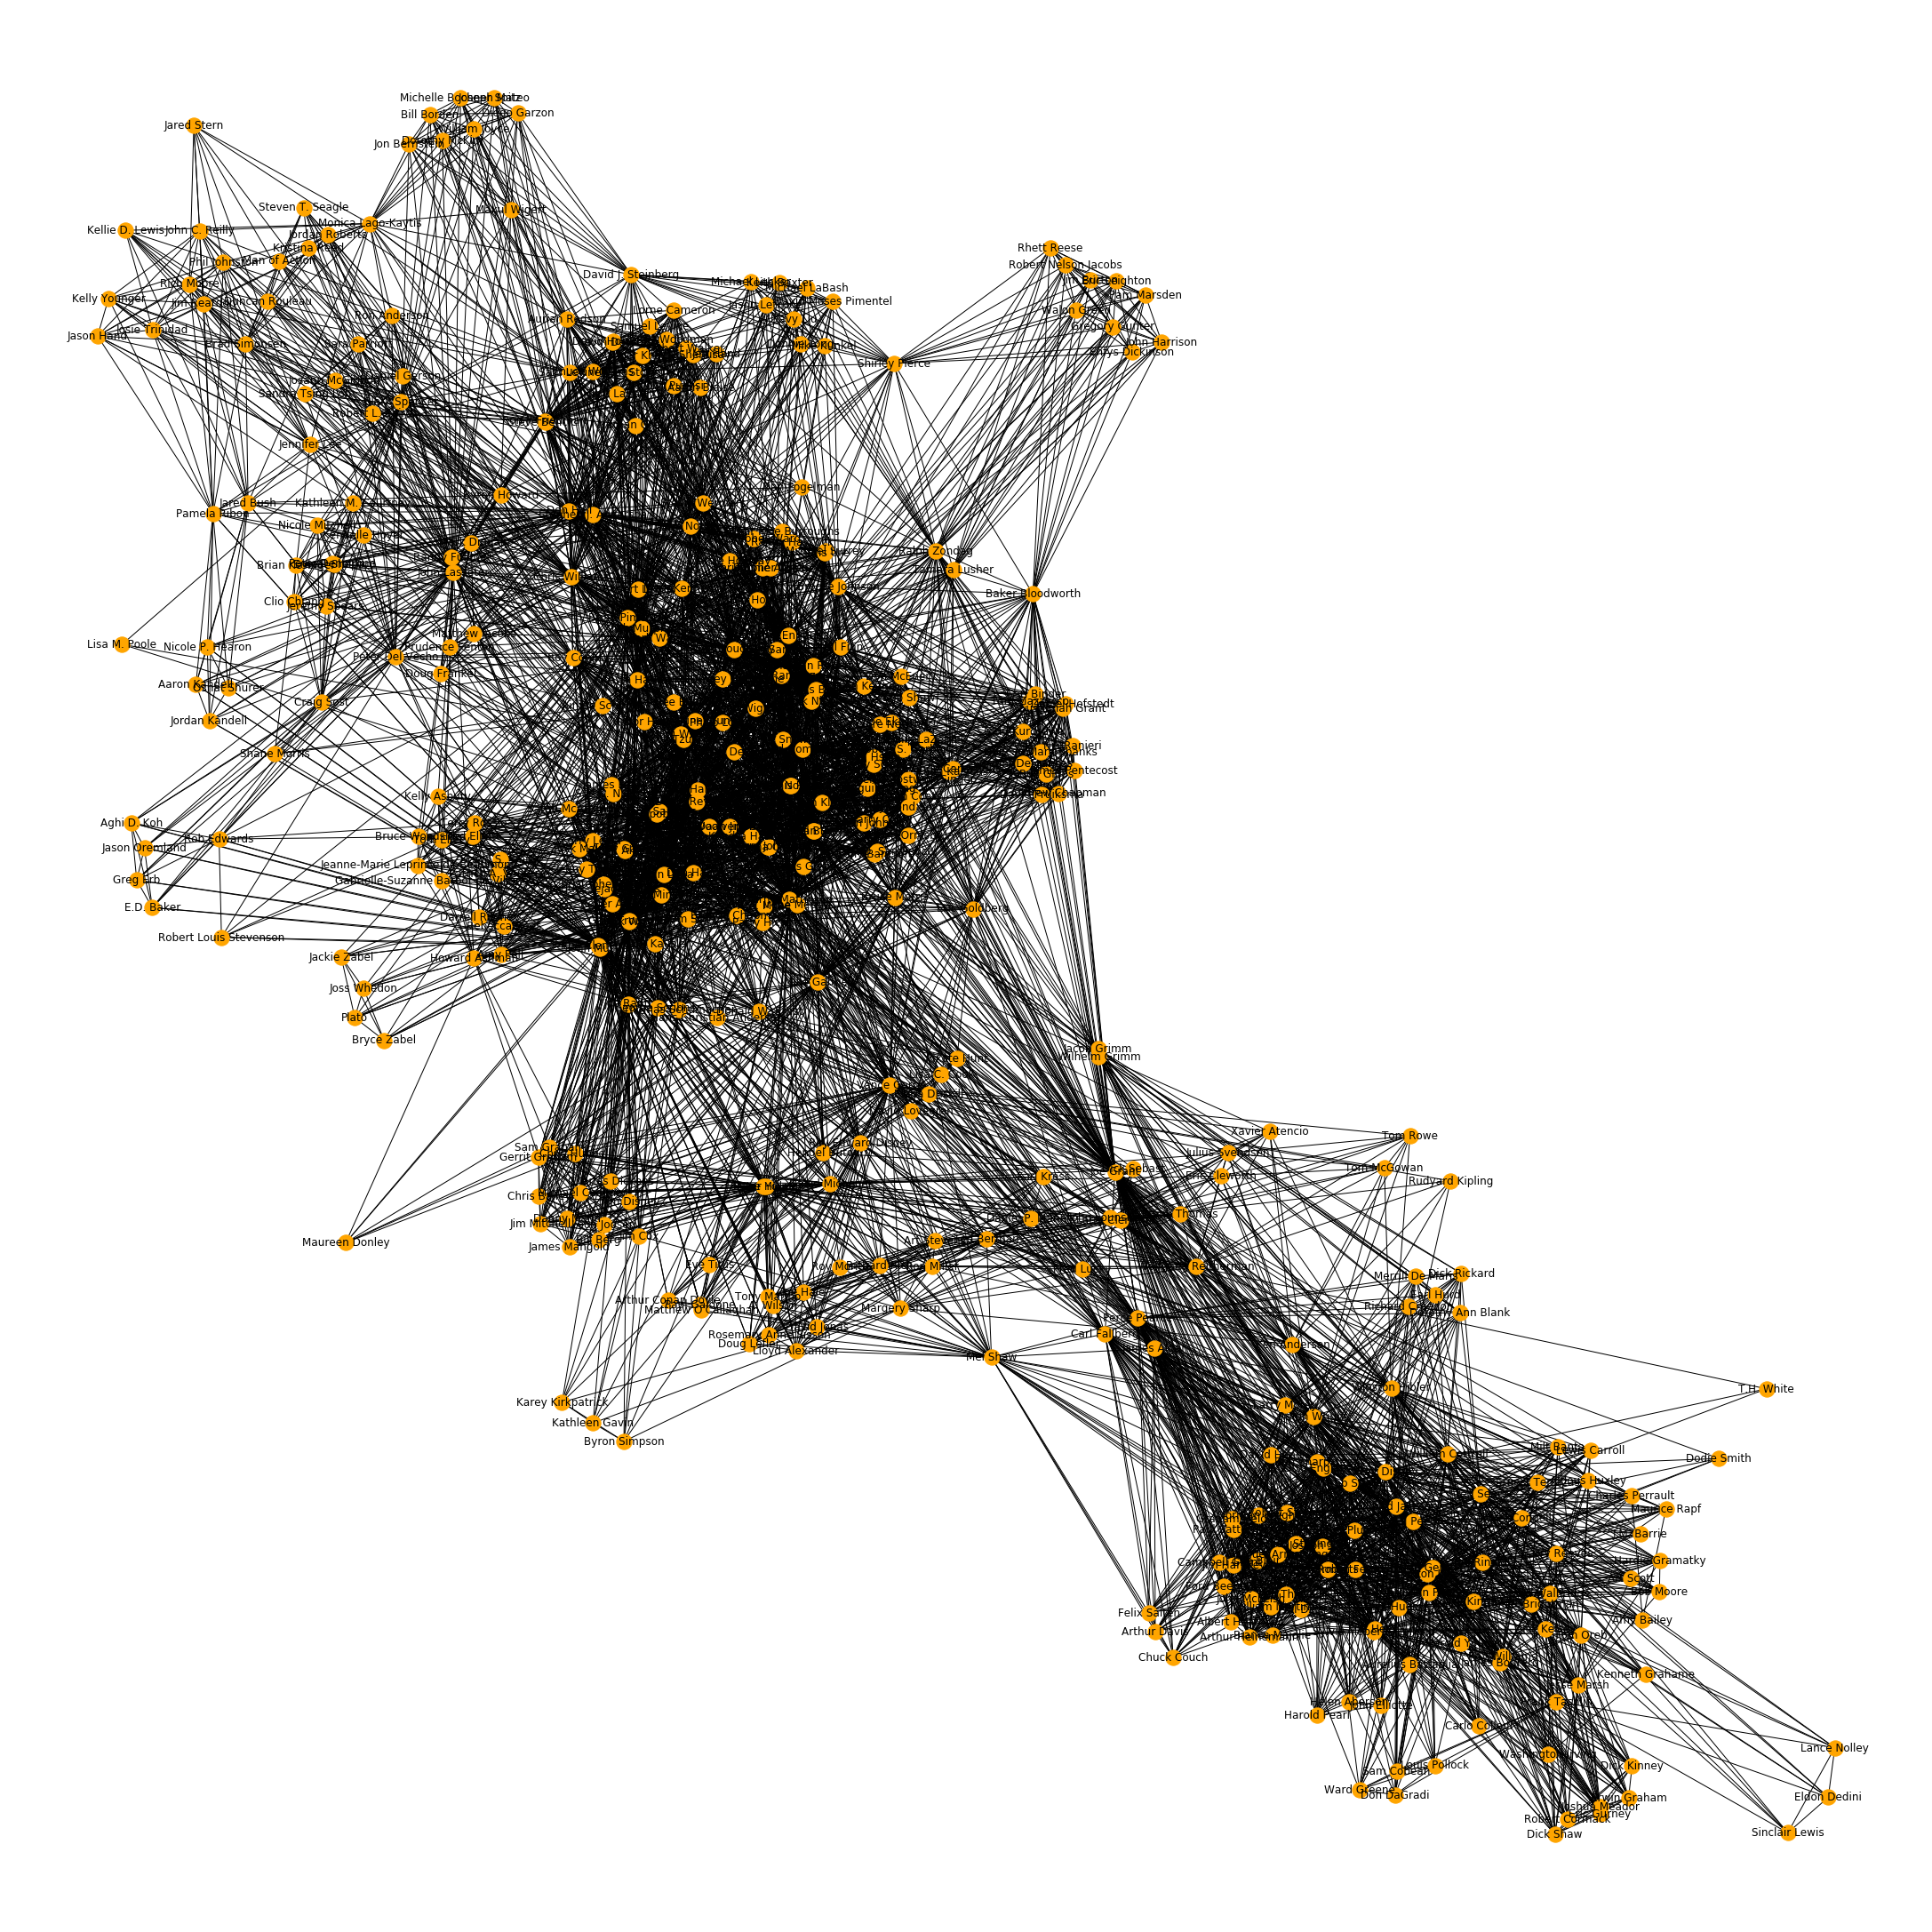

In [17]:
#Graph 1
plt.figure(figsize = (30, 30))
nx.draw_spring(G, with_labels=True, node_color='orange')
# nx.draw_networkx(
#     G, pos='spring', node_size=0, with_labels=True, alpha = 0.7, font_size = 15)

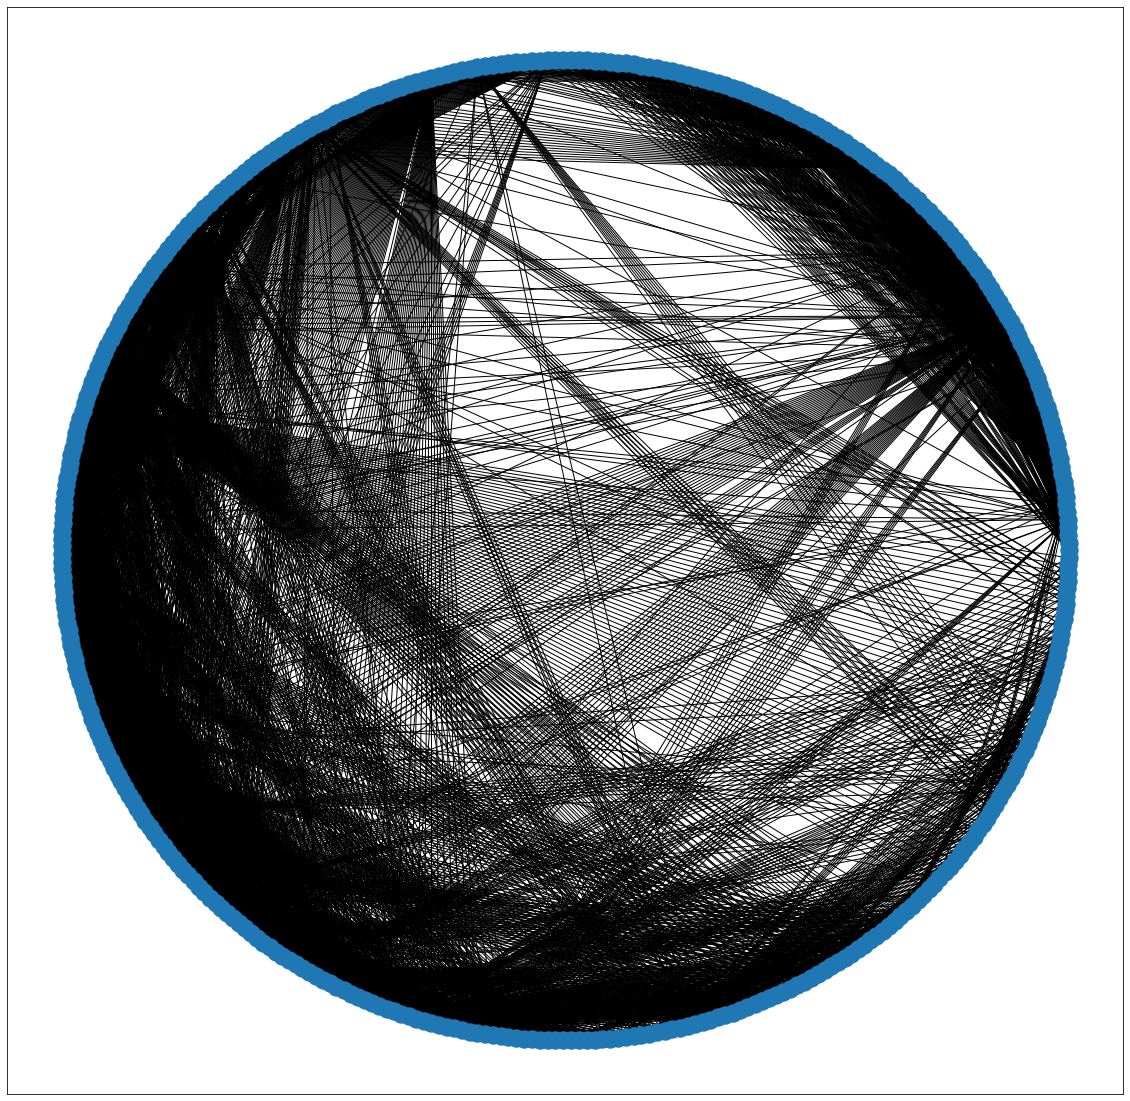

In [18]:
#Graph 2
plt.figure(figsize = (20, 20))
nx.draw_networkx(G, pos = nx.circular_layout(G), with_labels=False)

The links almost resembles a random network. We expect that in this network where almost all the nodes have collaborated with each other, the network is almost random.

#### Degree distribution: Is this network scale-free?

In [19]:
#Take the degrees
degrees = [G.degree(node) for node in G]
degrees.sort(reverse=True)
kmin = min(degrees)
kmax = max(degrees)
print("Degree sequence", degrees)
print("Degree min", kmin)
print("Degree max", kmax)
print("Degree mean", stat.mean(degrees))
print("Degree sd", stat.stdev(degrees))

Degree sequence [164, 138, 123, 116, 113, 112, 112, 108, 101, 91, 88, 88, 87, 87, 85, 85, 85, 85, 82, 82, 81, 81, 81, 80, 79, 79, 79, 78, 78, 78, 77, 76, 75, 72, 72, 71, 71, 71, 70, 70, 69, 69, 68, 68, 67, 64, 64, 64, 62, 62, 62, 62, 62, 61, 61, 60, 60, 60, 60, 59, 59, 59, 59, 59, 59, 58, 58, 57, 55, 55, 54, 54, 54, 53, 53, 53, 53, 52, 52, 52, 52, 51, 51, 50, 50, 50, 49, 49, 49, 49, 48, 47, 47, 47, 46, 45, 45, 44, 44, 44, 43, 43, 43, 43, 43, 42, 42, 42, 42, 41, 41, 40, 40, 40, 39, 39, 37, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 33, 33, 33, 32, 32, 32, 32, 31, 30, 30, 30, 30, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 27, 26, 25, 25, 25, 25, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 21, 21

In [20]:
#We shall use the powerlaw package developed by Alstott, et al.
fit = pw.Fit(degrees)

Calculating best minimal value for power law fit
C:\Users\Lenovo\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


Text(0.5, 1.0, 'Degree distribution (dotted) and Theoretical PDF (line)')

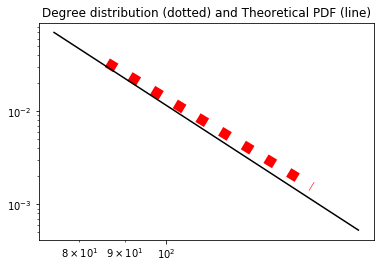

In [21]:
#Plot of the strength distribution in Log-log scale and the theoretical pdf
fig1 = fit.plot_pdf(color='r', linewidth = 10, linestyle= ":")
fit.power_law.plot_pdf(color='black', linestyle="-", ax=fig1)
plt.title('Degree distribution (dotted) and Theoretical PDF (line)')

In [22]:
#MLE Estimate of alpha, [Clauset, et al. 2009]
print("MLE for alpha:", fit.power_law.alpha)

MLE for alpha: 6.242515491544488


#### Size of the network

In [23]:
#Diameter: longest path
print("Diameter:", nx.diameter(G))

#Average path
print("Average shortest path", nx.average_shortest_path_length(G))

Diameter: 5
Average shortest path 2.3921459699023493


In [24]:
def path_length_histogram(G, title=None):
    # Find path lengths
    length_source_target = dict(nx.shortest_path_length(G))
    # Convert dict of dicts to flat list
    all_shortest = sum([list(length_target.values())
        for length_target in length_source_target.values()], [])
    # Calculate integer bins
    high = max(all_shortest)
    bins = [-0.5 + i for i in range(high + 2)]
    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.hist(all_shortest, bins=bins, rwidth=0.8)
    plt.title(title)
    plt.xlabel("Distance")
    plt.ylabel("Count")
    plt.tight_layout()

([<matplotlib.axis.XTick at 0x219a67e09c8>,
 <a list of 5 Text xticklabel objects>)

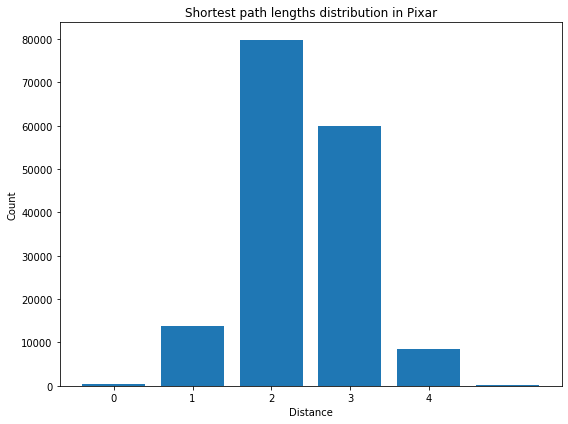

In [25]:
path_length_histogram(G, title="Shortest path lengths distribution in Pixar")
plt.xticks([0, 1, 2, 3, 4])

#### Measures of Centrality

In [26]:
#Global clustering
print("Transitivity:", nx.transitivity(G))
print("Average clustering:", nx.average_clustering(G))

Transitivity: 0.5390004548157996
Average clustering: 0.80956266899707


#### The Central Airports: The hubs, the most in-between, and the closest

In [27]:
#Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G)
print("The top 10 hubs:")
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:10]

The top 10 hubs:


[('Burny Mattinson', 0.19280428553741644),
 ('Ed Gombert', 0.16885856285936754),
 ('Kevin Harkey', 0.1543160764554303),
 ('Thom Enriquez', 0.15235646971301808),
 ('Don Dougherty', 0.15226375700673206),
 ('Francis Glebas', 0.15034267142459198),
 ('Jeff Snow', 0.1404846094726319),
 ('Jorgen Klubien', 0.13154924402565432),
 ('Chris Sanders', 0.12984458386738415),
 ('Don Hahn', 0.12760408582106222)]

In [28]:
#Local Clustering Coefficient of the top-10 Hubs
clustering = nx.clustering(G)
print("The local clustering coeff of the top 10 hubs:")
[(x, clustering[x]) for x in sorted(G, key=lambda x:eigenvector[x], reverse=True)[0:10]]

The local clustering coeff of the top 10 hubs:


[('Burny Mattinson', 0.2335029178512644),
 ('Ed Gombert', 0.3786346396965866),
 ('Kevin Harkey', 0.3490990990990991),
 ('Thom Enriquez', 0.3367117117117117),
 ('Don Dougherty', 0.2998800479808077),
 ('Francis Glebas', 0.35496711664935965),
 ('Jeff Snow', 0.46351242983159585),
 ('Jorgen Klubien', 0.4669467787114846),
 ('Chris Sanders', 0.43330660251269715),
 ('Don Hahn', 0.37484737484737485)]

In [29]:
#Betweenness Centrality
betweenness = nx.betweenness_centrality(G, normalized=False)
print("The top 10 hubs and their betweenness")
sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[0:10]

The top 10 hubs and their betweenness


[('Joe Grant', 15900.270492075844),
 ('Burny Mattinson', 7079.192082559334),
 ('John Lasseter', 4370.811290001994),
 ('Chris Williams', 4301.267347028167),
 ('Vance Gerry', 3356.0989846525335),
 ('Don Hall', 3213.7321260993326),
 ('Don Dougherty', 2979.1851180174826),
 ('Thom Enriquez', 2802.5299244432176),
 ('David Reynolds', 2110.9189373467957),
 ('John Musker', 2040.274057428447)]

In [30]:
#Closeness Centrality
closeness = nx.closeness_centrality(G)
print("The top 10 hubs and their closeness")
#[(x, closeness[x]) for x in sorted(G1, key=lambda x:eigenvector[x], reverse=True)[0:10]]
sorted(closeness.items(), key=lambda x: x[1], reverse=True)[0:10]

The top 10 hubs and their closeness


[('Burny Mattinson', 0.6109422492401215),
 ('Joe Grant', 0.5894428152492669),
 ('Don Dougherty', 0.5646067415730337),
 ('Thom Enriquez', 0.5521978021978022),
 ('Francis Glebas', 0.547683923705722),
 ('Ed Gombert', 0.5469387755102041),
 ('Don Hahn', 0.543978349120433),
 ('Chris Williams', 0.5410497981157469),
 ('David Reynolds', 0.5352862849533955),
 ('Jeff Snow', 0.5338645418326693)]

#### Community structure

In [31]:
#Greedy algo
# Find the communities
print("Community Detection: Clauset-Newman-Moore Greedy Algorithm")
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

# Count the communities
print("Number of communities:", len(communities))
for i in range(len(communities)):
    print("")
    print("Community {}: {}".format(i+1, list(communities[i])))

Community Detection: Clauset-Newman-Moore Greedy Algorithm
Number of communities: 4

Community 1: ['Francis Glebas', 'Roy Conli', 'Floyd Norman', 'David S. Smith', 'Kirk Hanson', 'Karey Kirkpatrick', 'Jeanne-Marie Leprince de Beaumont', 'Bryce Zabel', 'Bruce Morris', 'Michael Cedeno', 'Mark Walton', 'Christopher Ward', 'Chris Bailey', 'Christine Blum', 'Randy Haycock', 'David Reynolds', 'Burny Mattinson', 'Byron Simpson', 'Kelly Asbury', 'Steve Hulett', "Matthew O'Callaghan", 'Paul Galdone', 'Charles Dickens', 'Denis Rich', 'Jeff Snow', 'Geefwee Boedoe', 'Barry Cook', 'Lisa M. Poole', 'Randy Cartwright', 'Theodore Newton', 'Tim Hodge', 'Brenda Chapman', 'Jackie Zabel', 'Raymond Singer', 'John Ramirez', 'John Norton', 'Chris Hubbell', 'Stevie Wermers', 'Victor Hugo', 'Jonathan Roberts', 'Noni White', 'Robert S. Garber', 'Maureen Donley', 'Danny Mann', 'Irene Mecchi', 'Jim Mitchell', 'Kirk Wise', 'Patrick A. Ventura', 'Rick Maki', 'Glen Keane', 'Christopher Vogler', 'Robert Lence', 'Robe

In [32]:
#Visualization
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
            
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0
            
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [33]:
# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)

# Set community color for nodes
node_color = [
    get_color(G.nodes[v]['community'])
    for v in G.nodes]

# Set community color for internal edges
external = [
    (v, w) for v, w in G.edges
    if G.edges[v, w]['community'] == 0]
internal = [
    (v, w) for v, w in G.edges
    if G.edges[v, w]['community'] > 0]
internal_color = [
    get_color(G.edges[e]['community'])
    for e in internal]

C:\Users\Lenovo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Lenovo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


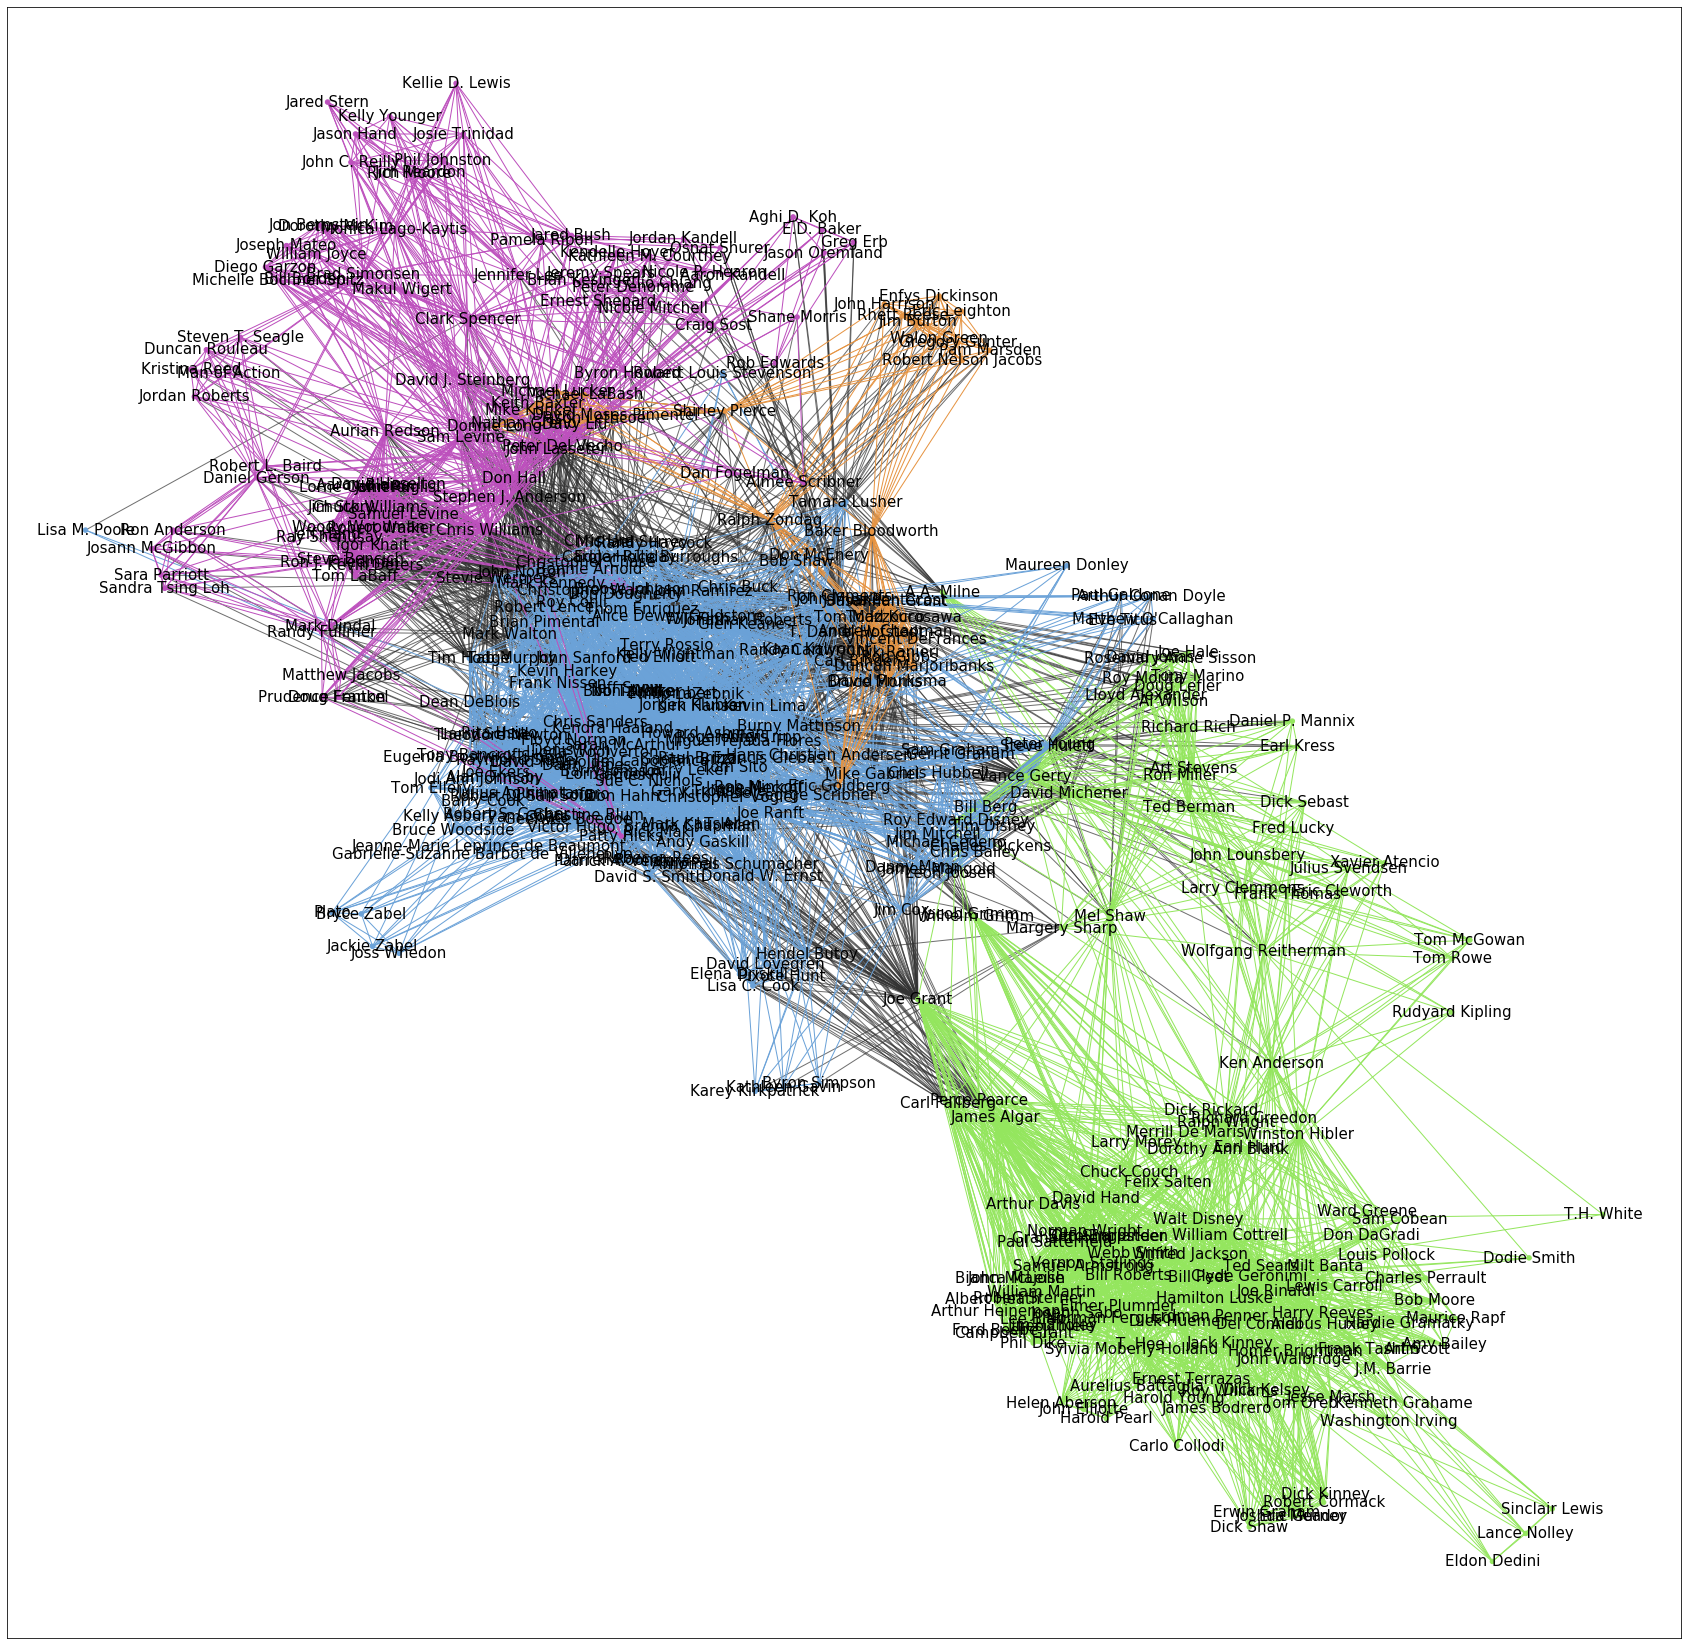

In [34]:
plt.figure(figsize=(30, 30))
pos = nx.spring_layout(G)
# Draw external edges
nx.draw_networkx(
    G, pos=pos, node_size=0,
    edgelist=external, edge_color="#333333", with_labels=False, alpha = 0.7, font_size = 15)
# Draw nodes and internal edges
nx.draw_networkx(
    G, pos=pos, node_color=node_color,
    edgelist=internal, edge_color=internal_color, node_size=20, 
    with_labels=True, font_size = 15)
#plt.title("Communities of Directors, Writers, Screenplay and Producers in Pixar")